# HOMEWORK 3

## 2 Programming

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings

warnings.filterwarnings("ignore")

### 1.

In [2]:
lines = open('D2z.txt').read().strip('\n').split('\n')
trainX =np.array([[float(line.split()[0]), float(line.split()[1])] for line in lines])
trainY = np.array([int(line.split()[2]) for line in lines])

nn = MLPClassifier(hidden_layer_sizes=(200,100),alpha=0.01,max_iter=300)
nn.fit(trainX, trainY)

testX = np.array([[x, y] for y in np.linspace(-2, 2, 41) for x in np.linspace(-2, 2, 41)])
prediction = nn.predict(testX)

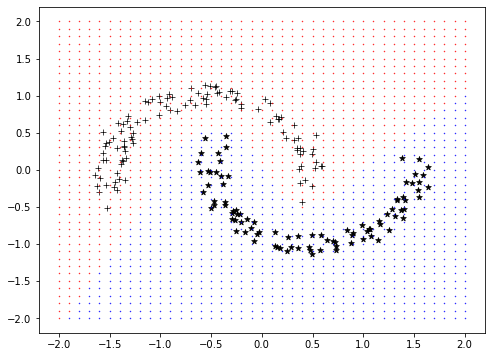

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(trainX[trainY == 0][:, 0], trainX[trainY == 0][:, 1], marker = '*', \
            color = 'black', linewidths= 0.7)
plt.scatter(trainX[trainY == 1][:, 0], trainX[trainY == 1][:, 1], marker = '+', \
            color = 'black', linewidths= 0.7)

plt.scatter(testX[prediction == 0][:, 0], testX[prediction == 0][:, 1], marker = 'o', \
            color = 'b', s= 0.2)
plt.scatter(testX[prediction == 1][:, 0], testX[prediction == 1][:, 1], marker = 'o', \
            color = 'r', s= 0.2)

### 2.

In [4]:
df_email = pd.read_csv("emails.csv", index_col = 0)

nn = MLPClassifier(hidden_layer_sizes=(10,5),alpha=0.01, max_iter=300)
metrics = []
for i in range(5):
    train_index = list(range(i * 1000)) + list(range(i * 1000 + 1000, 5000))
    test_index = list(range(i * 1000, i * 1000 + 1000))
    train_X, train_y = df_email.iloc[train_index, :-1], df_email.iloc[train_index, -1]
    test_X, test_y = df_email.iloc[test_index, :-1], df_email.iloc[test_index, -1]
    nn.fit(train_X, train_y)
    predictions = nn.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    metrics.append([accuracy, precision, recall])


        accuracy  precision    recall
Fold 1     0.973   0.921569  0.989474
Fold 2     0.975   0.940559  0.971119
Fold 3     0.975   0.938983  0.975352
Fold 4     0.974   0.943709  0.969388
Fold 5     0.954   0.896341  0.960784


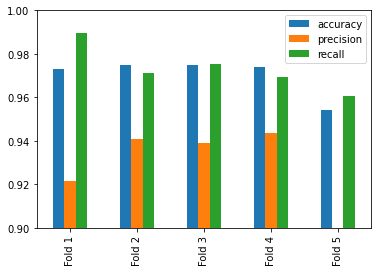

In [5]:
df_metrics = pd.DataFrame(metrics, index = ['Fold ' + str(i + 1) for i in range(5)])
df_metrics.columns = ['accuracy', 'precision', 'recall']
df_metrics.plot(kind = 'bar', ylim = (0.9, 1))
print(df_metrics)

### 3.

In [6]:
def logit_gradient(train_X, train_y, beta):
    train_X = np.column_stack((train_X.values, np.ones(train_X.shape[0])))
    z = train_X @ beta.reshape(-1, 1)
    f = 1 / (1 + np.exp(-z))
    g = (f.reshape(-1) - train_y.values).reshape(-1, 1) * train_X
    g = g.mean(axis = 0)
    return g

def logistc_regression(train_X, train_y, lr=0.0001, max_iter = 100):
    beta = np.zeros(train_X.shape[1] + 1)
    for _ in range(max_iter):
        gradient = logit_gradient(train_X, train_y, beta)
        beta = beta - lr * gradient
    return beta

def logit_predict(test_X, beta):
    test_X = np.column_stack((test_X.values, np.ones(test_X.shape[0])))
    z = test_X @ beta.reshape(-1, 1)
    f = 1 / (1 + np.exp(-z))
    prediction = (f >= 0.5).astype(int)
    return prediction, f

In [7]:
lrs = [0.00001, 0.0001, 0.001, 0.001, 0.01, 0.1]

lr_metrics = []
for lr in lrs:
    metrics = []
    for i in range(5):
        train_index = list(range(i * 1000)) + list(range(i * 1000 + 1000, 5000))
        test_index = list(range(i * 1000, i * 1000 + 1000))
        train_X, train_y = df_email.iloc[train_index, :-1], df_email.iloc[train_index, -1]
        test_X, test_y = df_email.iloc[test_index, :-1], df_email.iloc[test_index, -1]
        beta = logistc_regression(train_X, train_y, lr = lr)
        predictions, _ = logit_predict(test_X, beta)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        metrics.append([accuracy, precision, recall])
    metrics.append(list(np.mean(metrics, axis = 0)))
    df_metrics = pd.DataFrame(metrics, index = ['Fold ' + str(i + 1) for i in range(5)] + ['Average'])
    df_metrics.columns = ['accuracy', 'precision', 'recall']
    lr_metrics.append(df_metrics)

In [8]:
for i in range(len(lrs)):
    print('Learning rate: {}'.format(lrs[i]))
    print(lr_metrics[i])
    print()

Learning rate: 1e-05
         accuracy  precision    recall
Fold 1      0.717   0.625000  0.017544
Fold 2      0.730   0.888889  0.028881
Fold 3      0.729   0.933333  0.049296
Fold 4      0.714   1.000000  0.027211
Fold 5      0.700   0.750000  0.029412
Average     0.718   0.839444  0.030469

Learning rate: 0.0001
         accuracy  precision    recall
Fold 1     0.8160   0.767196  0.508772
Fold 2     0.7990   0.737500  0.425993
Fold 3     0.8150   0.841379  0.429577
Fold 4     0.7910   0.754491  0.428571
Fold 5     0.7260   0.585106  0.359477
Average    0.7894   0.737134  0.430478

Learning rate: 0.001
         accuracy  precision    recall
Fold 1     0.7510   0.821429  0.161404
Fold 2     0.6570   0.441901  0.906137
Fold 3     0.7370   0.838710  0.091549
Fold 4     0.7280   0.823529  0.095238
Fold 5     0.7080   0.594595  0.143791
Average    0.7162   0.704033  0.279624

Learning rate: 0.001
         accuracy  precision    recall
Fold 1     0.7510   0.821429  0.161404
Fold 2     0.65

The best learning rate is $0.0001$.

### 4.

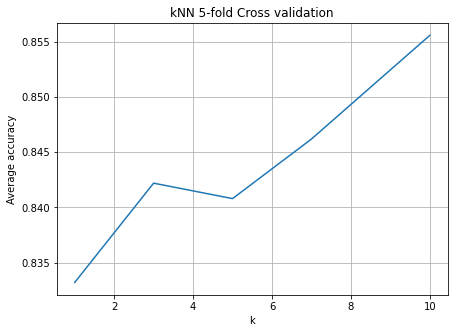

In [9]:
ks = [1, 3, 5, 7, 10]
average_accus = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors = k)
    accus = []
    for i in range(5):
        train_index = list(range(i * 1000)) + list(range(i * 1000 + 1000, 5000))
        test_index = list(range(i * 1000, i * 1000 + 1000))
        train_X, train_y = df_email.iloc[train_index, :-1], df_email.iloc[train_index, -1]
        test_X, test_y = df_email.iloc[test_index, :-1], df_email.iloc[test_index, -1]
        knn.fit(train_X, train_y)
        predictions = knn.predict(test_X)
        accuracy = accuracy_score(test_y, predictions)
        accus.append(accuracy)
    average_accus.append(np.mean(accus))

plt.figure(figsize = (7,5))
plt.grid()
plt.plot(ks, average_accus)
plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.title('kNN 5-fold Cross validation')
plt.show()

### 5.

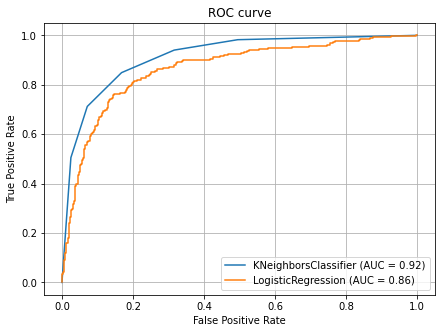

In [11]:
i = 0
train_index = list(range(i * 1000)) + list(range(i * 1000 + 1000, 5000))
test_index = list(range(i * 1000, i * 1000 + 1000))
train_X, train_y = df_email.iloc[train_index, :-1], df_email.iloc[train_index, -1]
test_X, test_y = df_email.iloc[test_index, :-1], df_email.iloc[test_index, -1]

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_y)
knn_probs = knn.predict_proba(test_X)[:, 1]
knn_fpr, knn_tpr, knn_thresholds = roc_curve(test_y, knn_probs, pos_label=1)
knn_auc_value = auc(knn_fpr, knn_tpr)
plt.figure(figsize = (7, 5))
plt.plot(knn_fpr, knn_tpr)


beta = logistc_regression(train_X, train_y, lr = 0.0001)
_, logit_probs = logit_predict(test_X, beta)
logit_fpr, logit_tpr, knn_thresholds = roc_curve(test_y, logit_probs, pos_label=1)
logit_auc_value = auc(logit_fpr, logit_tpr)
plt.plot(logit_fpr, logit_tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid()
plt.legend(['KNeighborsClassifier (AUC = {:.2f})'.format(knn_auc_value),  \
            'LogisticRegression (AUC = {:.2f})'.format(logit_auc_value),])